# Heatmap example

In [1]:
# %%%%%%%% imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plot_misc.utils.utils as pm_utils
import plot_misc.heatmap as heatmap
import plot_misc.example_data.examples as examples
%matplotlib inline
from IPython.core.display import display


/home/amand/google_drive/Research/plot-misc/plot_misc/table/layout.py:24: FutureWarning: The `layout.py` module will be moved to the `data-clean` package in the near future.
  FutureWarning)


In [2]:
# import example data
matrix = examples.load_heatmap_data()

# constants
CMTOINCH = 1/2.54
CBAR_FSIZE=12
CBAR_FTSIZE=8
CBAR_LABEL =  r"dir $\times -\log_{10}$(p)"
LWD = 1.0
PAD=1.5
COLB= 'b'
LENT=3
CMAP_N=13

# CMAP
cmap = plt.get_cmap("PiYG", CMAP_N)
bounds = [-8, -6, -4, -2, 0, 2, 4, 6, 8]
norm = pm_utils.MidpointNormalize(vcenter = 0, vmin=-8, vmax=8)

## plotting heatmap
Adding additional annotations.

/home/amand/miniconda3/envs/merit/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


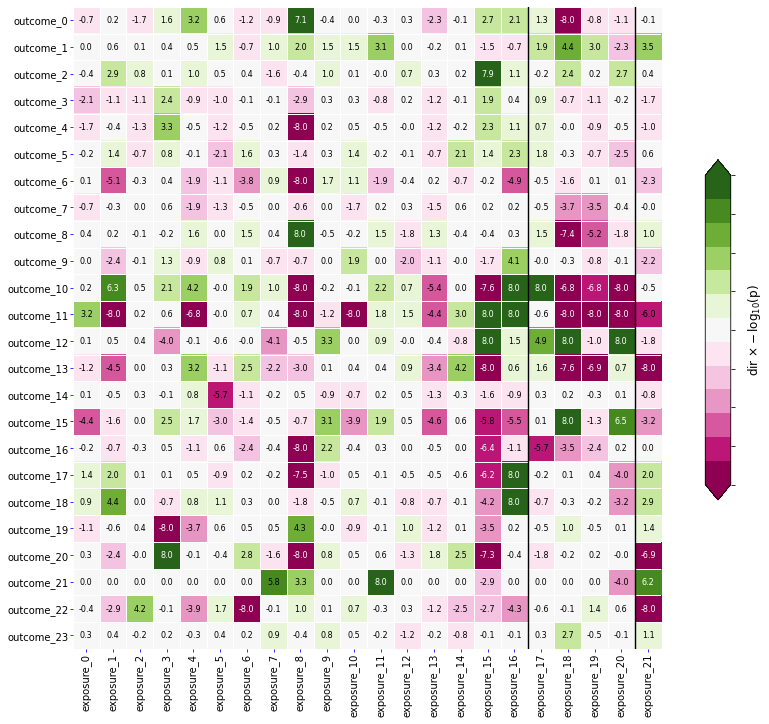

In [3]:
fig, ax = plt.subplots(1, figsize=(30*CMTOINCH, 30*CMTOINCH))
# location of cbar
cbar_ax = fig.add_axes([.91, .3, .03, .4])
# plotting heatmap
im, cbar = heatmap.heatmap(data=matrix, row_labels=matrix.index.to_list(),
                           col_labels=matrix.columns.to_list(), ax=ax,
                           cmap=cmap,grid_linewidth=LWD,
                           )
# adding annotation
texts = heatmap.annotate_heatmap(im, threshold=6, valfmt="{x:.1f}", fontsize=8)

# adding cbar
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=cbar_ax, orientation='vertical', extend='both',
             )
# cbar formatting
cbar_ax.axes.set_ylabel(CBAR_LABEL, fontsize=CBAR_FSIZE, rotation=90, labelpad=8)
cbar_ax.axes.set_yticklabels(cbar_ax.axes.get_ymajorticklabels(),
                           fontsize=CBAR_FTSIZE)
# ticks
im.axes.tick_params(pad=PAD, color=COLB, length=LENT, bottom=True)
im.axes.set_xticklabels(im.axes.get_xmajorticklabels(), fontsize=10,
                        rotation=90, va='center')
# hline
im.axes.axvline(16.5, linewidth=1.4, color='black')
im.axes.axvline(20.5, linewidth=1.4, color='black')

## cluster map

This module also includes a seaborn wrapper over clustermap, which can order the row and column based on the matrix elements.

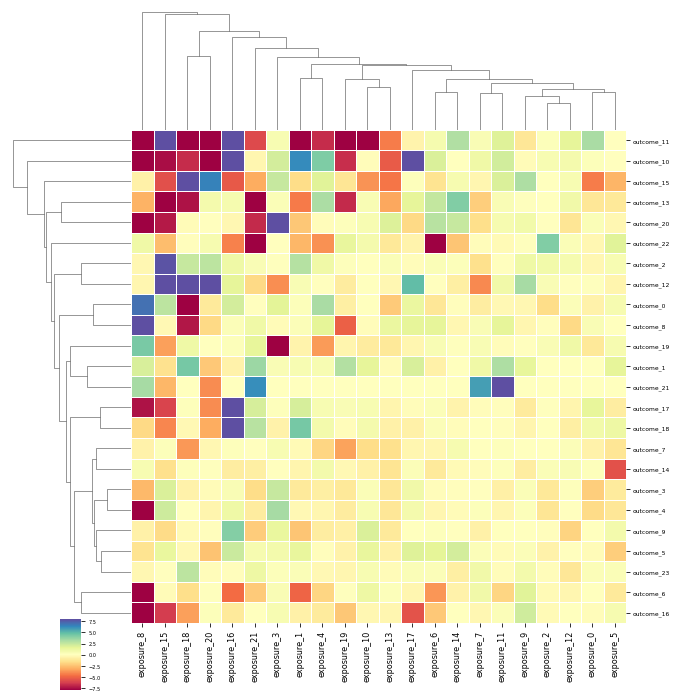

In [4]:
heatmap.clustermap(data=matrix, fsize=(25,25))

In [5]:
help(heatmap)

Help on module plot_misc.heatmap in plot_misc:

NAME
    plot_misc.heatmap - A module to draw and annotate heatmaps using matplotlib.

DESCRIPTION
    Code addapted from:
        <https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html>

FUNCTIONS
    annotate_heatmap(im: <function Axes.imshow at 0x7f8a182178c0>, data: Union[pandas.core.frame.DataFrame, as_array, NoneType] = None, valfmt: Union[str, matplotlib.ticker.Formatter, NoneType] = None, textcolors: Union[Tuple[str], List[str]] = ('black', 'white'), threshold: Union[float, NoneType] = None, **text_kw: Union[Any, NoneType]) -> List[matplotlib.text.Text]
        A function to annotate a heatmap.
        
        Parameters
        ----------
        im : `plt.Axes.imshow`
            The AxesImage to be labeled.
        data : pd.DataFrame or np.array, default Nonetype
            A 2D numpy array of shape (M, N). Optional.
        valfmt : str or `matplotlib.ticker.Formatter`, default NoneTy